# **BUISNESS CASE:**
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.

In [1]:
#Load important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **1.LOAD DATASET**

In [ ]:
#Laod dataset

In [2]:
path=r'/content/drive/MyDrive/IMP1DATAANLYST INTERVIEW2024/5.PROJECT DA/1.FRAUD DETECTION TASKINTERNSHIP1/Fraud.csv'

In [3]:
df=pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **2.UNDERSTAND THE DATA**

- step: unit of time (1 hour)
- type: type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER)
- amount: transaction amount
- nameOrig: customer initiating the transaction
- oldbalanceOrg: initial balance before transaction
- newbalanceOrig: balance after transaction
- nameDest: customer receiving the transaction
- oldbalanceDest: initial balance of recipient before transaction
- newbalanceDest: balance of recipient after transaction
- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.**

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
# Check data types
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:
df.describe().T #stastistics of the numerical features

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum() # no missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Check for duplicates
print(df.duplicated().sum())
#Ensure there are no duplicate rows in the dataset.

0


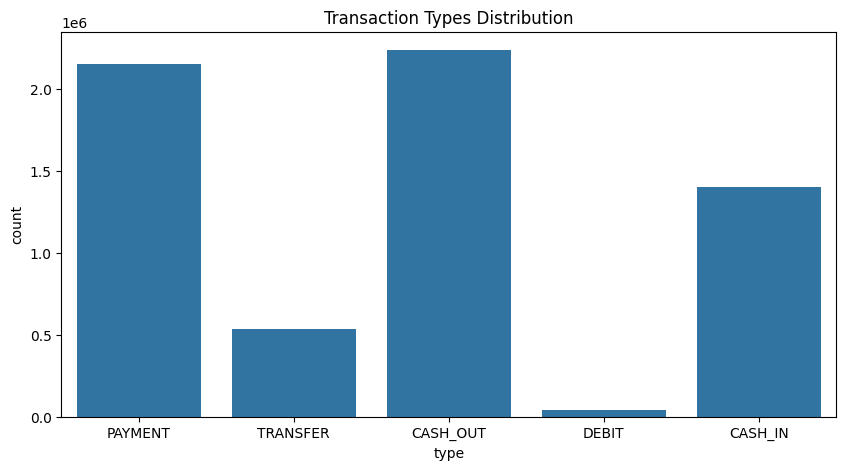

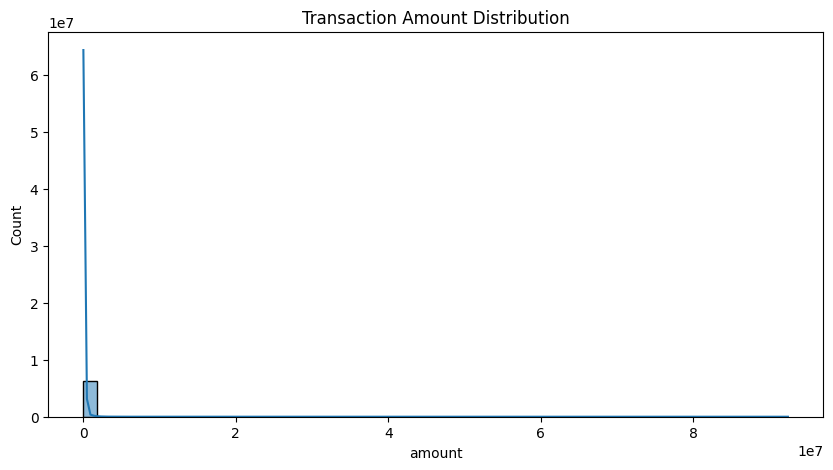

In [ ]:
# Plot distribution of transaction types
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df)
plt.title('Transaction Types Distribution')
plt.show()

# Plot distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


In [ ]:
df.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


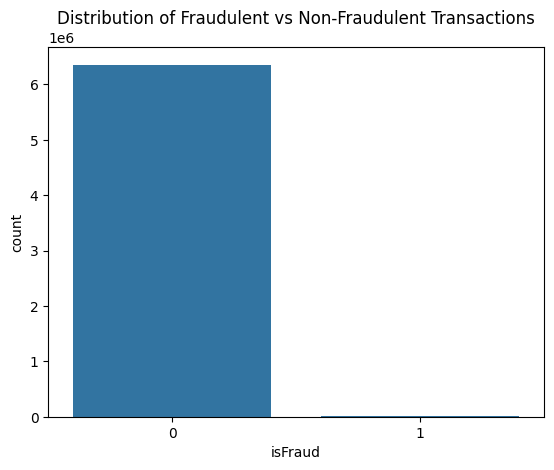

In [ ]:
import seaborn as sns

# Count plot of the isFraud column
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

**INSIGHTS:**
- Here target variables imbalceddataset
- 0: Non-fraudulent transactions
- 1:Fraudulent transactions

In [ ]:
fraud_percentage = (8213 / 6362620) * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")
#0.13%

Percentage of Fraudulent Transactions: 0.13%


In [5]:
#seperate numerical and categoricalfeatures:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns


In [6]:
print("numerical columns",num_cols,len(num_cols))

print("categorical columns",cat_cols,len(cat_cols))

numerical columns Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object') 8
categorical columns Index(['type', 'nameOrig', 'nameDest'], dtype='object') 3


### **Check mulicolinearity:**

In [7]:
# Select only numerical columns
numeric_df = df[num_cols]
correlation_matrix = numeric_df.corr()

In [ ]:
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


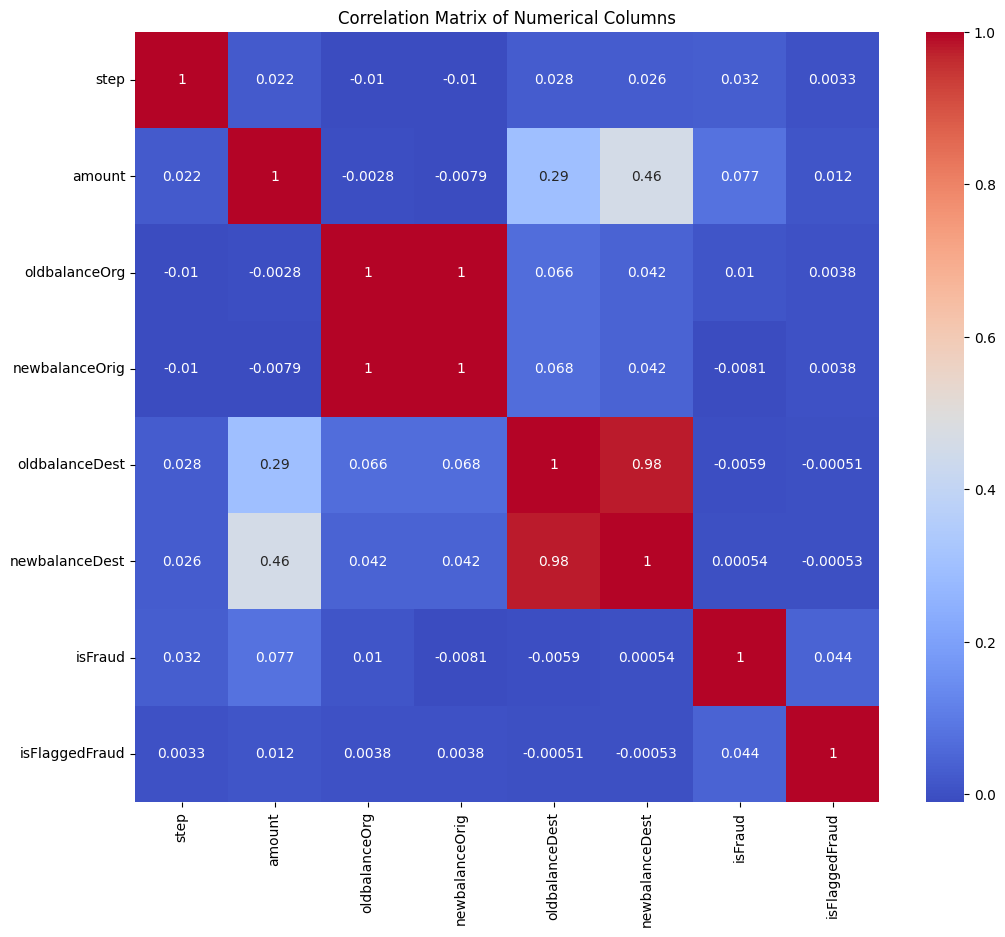

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### **INSIGHTS FROM HEATMAP:**
- step- shows very low correlations with other numerical variables, indicating it does not have a significant relationship with transaction characteristics or fraud indicators in this dataset.
- oldbalanceOrg and newbalanceOrig are highly positively correlated (0.999)
- oldbalanceDest and newbalanceDest are also highly correlated (0.977)
- isFlaggedFraud has a low positive correlation with amount (0.012) and other balance variables, showing that flagged fraud is not strongly related to transaction amount or account balances
- But he isFlaggedFraud feature is crucial because it indicates transactions already flagged as suspicious, helping the model focus on high-risk transactions. Including it enhances the model's accuracy by leveraging pre-existing fraud detection criteria.

- oldbalanceOrg and newbalanceOrig:oldbalanceOrg and newbalanceOrig:

### **DROPPING SOME IRRELEVANT FEATURES OR STRONGLY CORRELATED FEATURES:**

In [ ]:
# Drop oldbalanceOrig (keeping newbalanceOrig).
# Drop oldbalanceDest (keeping newbalanceDest).


In [9]:
# Drop redundant and less useful features

df_num_reduced = numeric_df.drop(columns=['oldbalanceOrg', 'oldbalanceDest', 'step'])
# isFlaggedFraud : imprtant featureso not drop

In [10]:
print(df_num_reduced.columns)

Index(['amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [11]:
df_cat=df[cat_cols]

In [12]:
# # Combine numerical and categorical DataFrames
df_final = pd.concat([df_num_reduced, df_cat], axis=1)


In [13]:
df_final.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,9839.64,160296.36,0.0,0,0,PAYMENT,C1231006815,M1979787155
1,1864.28,19384.72,0.0,0,0,PAYMENT,C1666544295,M2044282225
2,181.00,0.00,0.0,1,0,TRANSFER,C1305486145,C553264065
3,181.00,0.00,0.0,1,0,CASH_OUT,C840083671,C38997010
4,11668.14,29885.86,0.0,0,0,PAYMENT,C2048537720,M1230701703


In [ ]:
df_final.shape

(6362620, 8)

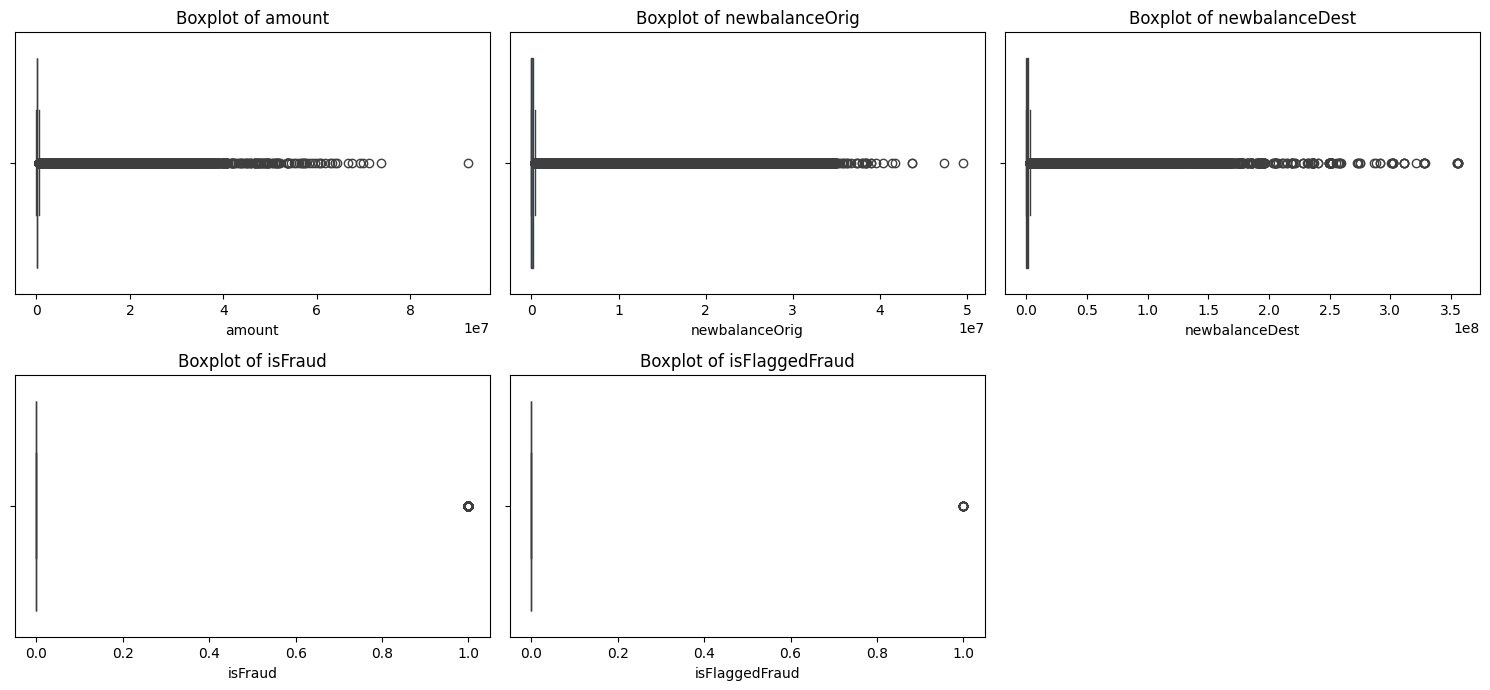

In [14]:
# List of numerical columns
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns

# Plotting box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size as needed
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
df_p = df_final.copy()


In [16]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Return DataFrame with outliers removed
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


In [17]:
# Apply outlier removal for each numerical column
for col in numerical_cols:
    df_processed = remove_outliers(df_p, col)


In [18]:
df_processed.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,9839.64,160296.36,0.0,0,0,PAYMENT,C1231006815,M1979787155
1,1864.28,19384.72,0.0,0,0,PAYMENT,C1666544295,M2044282225
2,181.00,0.00,0.0,1,0,TRANSFER,C1305486145,C553264065
3,181.00,0.00,0.0,1,0,CASH_OUT,C840083671,C38997010
4,11668.14,29885.86,0.0,0,0,PAYMENT,C2048537720,M1230701703


### **5.FEATURE ENGINEERING:**
- Feature Engineering involves creating new features from the existing ones and selecting which features to include in the model based on their importance and relevance.

In [19]:
# Feature Engineering
df_processed['balanceChange'] = df_processed['newbalanceDest'] - df_processed['amount']
df_processed['transactionSize'] = df_processed['amount'] / (df_processed['newbalanceOrig'] + 1)  # Adding 1 to avoid division by zer

In [20]:
# Drop original columns that are no longer needed
df_processed = df_processed.drop(columns=['isFlaggedFraud'])


### **Sepearate X and y**

In [21]:
# Separate features and target
X = df_processed.drop('isFraud', axis=1)
y = df_processed['isFraud']

In [ ]:
X.shape

(6362604, 8)

In [22]:
# Define categorical and numerical columns
categorical_cols = ['type']
numerical_cols = ['amount', 'newbalanceOrig', 'newbalanceDest', 'balanceChange', 'transactionSize']

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handling missing values
])

In [25]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handling missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical features
])

In [26]:
#Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [27]:
# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

In [28]:
print(pd.DataFrame(X_processed).head())

          0          1    2         3           4    5    6    7    8    9
0   9839.64  160296.36  0.0  -9839.64    0.061384  0.0  0.0  0.0  1.0  0.0
1   1864.28   19384.72  0.0  -1864.28    0.096168  0.0  0.0  0.0  1.0  0.0
2    181.00       0.00  0.0   -181.00  181.000000  0.0  0.0  0.0  0.0  1.0
3    181.00       0.00  0.0   -181.00  181.000000  0.0  1.0  0.0  0.0  0.0
4  11668.14   29885.86  0.0 -11668.14    0.390410  0.0  0.0  0.0  1.0  0.0


### **TRAIN TEST SPLIT**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


In [30]:
# Initialize and train the Logistic Regression model
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

In [31]:
 # Evaluate the model

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.998777230715713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906362
           1       0.64      0.08      0.14      2420

    accuracy                           1.00   1908782
   macro avg       0.82      0.54      0.57   1908782
weighted avg       1.00      1.00      1.00   1908782



In [ ]:
#plot the confusion matrix
'''The confusion matrix will give you a better understanding of how well your model is performing in terms of true positives,
 true negatives, false positives, and false negatives.'''


'The confusion matrix will give you a better understanding of how well your model is performing in terms of true positives, \n true negatives, false positives, and false negatives.'

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

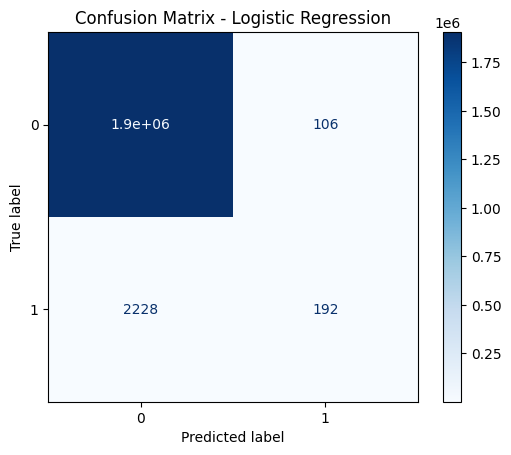

In [33]:
 #Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
print(cm)

[[1906256     106]
 [   2228     192]]


*Here Fraud detection is a scenario where the cost of false negatives (missed frauds) can be very high.*

## **Using resampling on target varaible:SMOTE**

> Add blockquote



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [37]:
model1_ = LogisticRegression(random_state=42)
model1_.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

In [38]:
y_pred = model1_.predict(X_test)

In [39]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.47054076121337096
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64   1270934
           1       0.00      0.90      0.00      1587

    accuracy                           0.47   1272521
   macro avg       0.50      0.68      0.32   1272521
weighted avg       1.00      0.47      0.64   1272521



In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[597350 673584]
 [   164   1423]]


**2. RANDOMFOREST CLASSIFIER:**
- Good for handling imbalanced data due to its ability to model complex relationships.

In [44]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize Balanced Random Forest
brf_model = BalancedRandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Train the model
brf_model.fit(X_train, y_train)


BalancedRandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [45]:

# Make predictions and evaluate
y_pred_brf = brf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))

Accuracy Score: 0.9113531328756068
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270934
           1       0.01      0.88      0.02      1587

    accuracy                           0.91   1272521
   macro avg       0.51      0.89      0.49   1272521
weighted avg       1.00      0.91      0.95   1272521



In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_brf)

In [48]:
print(conf_matrix)

[[1158325  112609]
 [    196    1391]]


***a good balance of precision and recall for the minority class (fraudulent transactions)***

***XgBoost model :***

In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
